In [4]:
%matplotlib inline

import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import math as m

pd.set_option('display.max_columns', None)
plt.style.use('bmh')

In [8]:
zipcodes = pd.read_csv('DataSets/SF_Population/ziplatlong.csv', sep=';')

In [9]:
police_incidents_new = pd.read_csv('DataSets/Stadium Impact/Police_Department_Incident_Reports__2018_to_Present.csv')
police_incidents_new.columns

Index(['Incident Datetime', 'Incident Date', 'Incident Time', 'Incident Year',
       'Incident Day of Week', 'Report Datetime', 'Row ID', 'Incident ID',
       'Incident Number', 'CAD Number', 'Report Type Code',
       'Report Type Description', 'Filed Online', 'Incident Code',
       'Incident Category', 'Incident Subcategory', 'Incident Description',
       'Resolution', 'Intersection', 'CNN', 'Police District',
       'Analysis Neighborhood', 'Supervisor District', 'Latitude', 'Longitude',
       'point', 'SF Find Neighborhoods', 'Current Police Districts',
       'Current Supervisor Districts', 'Analysis Neighborhoods',
       'HSOC Zones as of 2018-06-05', 'OWED Public Spaces',
       'Central Market/Tenderloin Boundary Polygon - Updated',
       'Parks Alliance CPSI (27+TL sites)', 'ESNCAG - Boundary File',
       'Areas of Vulnerability, 2016'],
      dtype='object')

In [10]:
police_incidents_new['Incident Date'] = pd.to_datetime(police_incidents_new['Incident Date'])

In [11]:
police_incidents_new['Month'] = police_incidents_new['Incident Date'].transform(lambda x: x.month)

In [12]:
police_incidents_new.groupby(['Incident Year','Month']).count()['Incident Date']

Incident Year  Month
2018           1        13321
               2        11817
               3        12508
               4        12502
               5        12951
               6        12403
               7        13802
               8        13899
               9        12782
               10       13273
               11       12034
               12       12373
2019           1        12122
               2        10976
               3        11801
               4        11795
               5        12281
               6        12099
               7        13098
               8        13716
               9        12850
               10       13615
               11       12144
               12       12218
2020           1        11963
               2        11101
               3         8656
               4         1162
Name: Incident Date, dtype: int64

In [13]:
police_incidents_new.isnull().sum()

Incident Datetime                                            0
Incident Date                                                0
Incident Time                                                0
Incident Year                                                0
Incident Day of Week                                         0
Report Datetime                                              0
Row ID                                                       0
Incident ID                                                  0
Incident Number                                              0
CAD Number                                               77784
Report Type Code                                             0
Report Type Description                                      0
Filed Online                                            262841
Incident Code                                                0
Incident Category                                           92
Incident Subcategory                                   

In [14]:
from geopy.distance import geodesic
test=[37.7196874952717, -122.476327815126]

def closest_pt(row):
    distances=[]
    zips=zipcodes[['Latitude','Longitude']]
    for elem in range(len(zipcodes.index)):
        try:
            dist = geodesic((row[0],row[1]), (zips.iloc[elem,0],zips.iloc[elem,1]))
            distances.append(dist)
        except ValueError:   
            continue
    return zipcodes.iloc[np.argmin(distances),0]

closest_pt(test)

94132

In [15]:
police_incidents_new[police_incidents_new['Analysis Neighborhood'].isna()].isna().sum()

Incident Datetime                                           0
Incident Date                                               0
Incident Time                                               0
Incident Year                                               0
Incident Day of Week                                        0
Report Datetime                                             0
Row ID                                                      0
Incident ID                                                 0
Incident Number                                             0
CAD Number                                              16676
Report Type Code                                            0
Report Type Description                                     0
Filed Online                                             4149
Incident Code                                               0
Incident Category                                           0
Incident Subcategory                                        0
Incident

In [16]:
police_incidents_new = police_incidents_new.fillna(0)

In [17]:
zips = police_incidents_new.groupby(['Latitude','Longitude'])['Incident Date'].count().reset_index()
zips['Lat_Long'] = zips[['Latitude', 'Longitude']].values.tolist()
zips.head()

,Latitude,Longitude,Incident Date,Lat_Long
0,0.000000,0.000000,17910,"[0.0, 0.0]"
1,37.707988,-122.462313,4,"[37.70798825918467, -122.46231335746752]"
2,37.708020,-122.412497,38,"[37.70802018416812, -122.41249676853344]"
3,37.708058,-122.441986,22,"[37.70805761187209, -122.44198634816915]"
4,37.708215,-122.452347,2,"[37.70821480335819, -122.45234680782866]"


In [18]:
zips['Zipcode'] = zips['Lat_Long'].apply(closest_pt)
zips

,Latitude,Longitude,Incident Date,Lat_Long,Zipcode
0,0.000000,0.000000,17910,"[0.0, 0.0]",94130
1,37.707988,-122.462313,4,"[37.70798825918467, -122.46231335746752]",94112
2,37.708020,-122.412497,38,"[37.70802018416812, -122.41249676853344]",94134
3,37.708058,-122.441986,22,"[37.70805761187209, -122.44198634816915]",94112
4,37.708215,-122.452347,2,"[37.70821480335819, -122.45234680782866]",94112
...,...,...,...,...,...
6387,37.829549,-122.371429,57,"[37.82954857858764, -122.37142899749846]",94130
6388,37.829617,-122.373178,14,"[37.82961662060153, -122.37317787318324]",94130
6389,37.829662,-122.375600,15,"[37.82966229571011, -122.3755995788448]",94130
6390,37.829792,-122.375324,16,"[37.829791577119025, -122.3753235669606]",94130


In [19]:
zips['str1']=zips['Latitude'].transform(lambda x: str(x))
zips['str2']=zips['Longitude'].transform(lambda x: str(x))
zips['indx']=zips['str1']+zips['str2']
# zips.to_csv('2018presentzips')
police_incidents_new['str1']=police_incidents_new['Latitude'].transform(lambda x: str(x))
police_incidents_new['str2']=police_incidents_new['Longitude'].transform(lambda x: str(x))
police_incidents_new['indx']=police_incidents_new['str1']+police_incidents_new['str2']

In [23]:
polpresent = pd.merge(police_incidents_new, zips, on='indx')
polpresent = polpresent.drop(columns=['str1_x','str2_x','indx','Latitude_y',
                                     'Longitude_y','Incident Date_y',
                                     'str1_y','str2_y'])
polpresent

,Incident Datetime,Incident Date_x,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,Report Type Code,Report Type Description,Filed Online,Incident Code,Incident Category,Incident Subcategory,Incident Description,Resolution,Intersection,CNN,Police District,Analysis Neighborhood,Supervisor District,Latitude_x,Longitude_x,point,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,HSOC Zones as of 2018-06-05,OWED Public Spaces,Central Market/Tenderloin Boundary Polygon - Updated,Parks Alliance CPSI (27+TL sites),ESNCAG - Boundary File,"Areas of Vulnerability, 2016",Month,Lat_Long,Zipcode
0,2019/05/01 01:00:00 AM,2019-05-01,01:00,2019,Wednesday,2019/06/12 08:27:00 PM,81097515200,810975,190424067,191634131.0,II,Initial,0,15200,Offences Against The Family And Children,Other,Domestic Violence (secondary only),Open or Active,40TH AVE \ IRVING ST,27789000.0,Taraval,Sunset/Parkside,4.0,37.762569,-122.499627,"(37.76256939715695, -122.49962745519909)",39.0,10.0,7.0,35.0,0.0,0.0,0.0,0.0,0.0,1.0,5,"[37.76256939715695, -122.49962745519908]",94122
1,2020/02/28 10:00:00 PM,2020-02-28,22:00,2020,Friday,2020/03/02 11:39:00 AM,90966328150,909663,206048955,0.0,II,Coplogic Initial,True,28150,Malicious Mischief,Vandalism,"Malicious Mischief, Vandalism to Property",Open or Active,40TH AVE \ IRVING ST,27789000.0,Taraval,Sunset/Parkside,4.0,37.762569,-122.499627,"(37.76256939715695, -122.49962745519909)",39.0,10.0,7.0,35.0,0.0,0.0,0.0,0.0,0.0,1.0,2,"[37.76256939715695, -122.49962745519908]",94122
2,2019/10/25 11:45:00 PM,2019-10-25,23:45,2019,Friday,2019/10/26 09:48:00 AM,86288607021,862886,190808762,192991312.0,VI,Vehicle Initial,0,7021,Motor Vehicle Theft,Motor Vehicle Theft,"Vehicle, Stolen, Auto",Open or Active,40TH AVE \ IRVING ST,27789000.0,Taraval,Sunset/Parkside,4.0,37.762569,-122.499627,"(37.76256939715695, -122.49962745519909)",39.0,10.0,7.0,35.0,0.0,0.0,0.0,0.0,0.0,1.0,10,"[37.76256939715695, -122.49962745519908]",94122
3,2019/10/03 06:59:00 PM,2019-10-03,18:59,2019,Thursday,2019/10/03 06:59:00 PM,85413763010,854137,190267544,192763614.0,IS,Initial Supplement,0,63010,Warrant,Other,"Warrant Arrest, Local SF Warrant",Cite or Arrest Adult,40TH AVE \ IRVING ST,27789000.0,Taraval,Sunset/Parkside,4.0,37.762569,-122.499627,"(37.76256939715695, -122.49962745519909)",39.0,10.0,7.0,35.0,0.0,0.0,0.0,0.0,0.0,1.0,10,"[37.76256939715695, -122.49962745519908]",94122
4,2019/10/29 01:56:00 PM,2019-10-29,13:56,2019,Tuesday,2019/10/29 03:05:00 PM,86407607041,864076,190808762,193022311.0,VS,Vehicle Supplement,0,7041,Recovered Vehicle,Recovered Vehicle,"Vehicle, Recovered, Auto",Open or Active,40TH AVE \ IRVING ST,27789000.0,Ingleside,Sunset/Parkside,4.0,37.762569,-122.499627,"(37.76256939715695, -122.49962745519909)",39.0,10.0,7.0,35.0,0.0,0.0,0.0,0.0,0.0,1.0,10,"[37.76256939715695, -122.49962745519908]",94122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335257,2019/05/13 10:35:00 PM,2019-05-13,22:35,2019,Monday,2019/05/13 10:48:00 PM,80064864020,800648,190344114,191334254.0,II,Initial,0,64020,Non-Criminal,Other,Mental Health Detention,Open or Active,ALTON AVE \ 09TH AVE,27041000.0,Taraval,West of Twin Peaks,7.0,37.750333,-122.465378,"(37.750332854165045, -122.46537809463156)",45.0,10.0,8.0,41.0,0.0,0.0,0.0,0.0,0.0,1.0,5,"[37.75033285416505, -122.46537809463156]",94143
335258,2019/08/10 10:00:00 PM,2019-08-10,22:00,2019,Saturday,2019/08/19 07:50:00 PM,83631805081,836318,190612977,192313354.0,II,Initial,0,5081,Burglary,Burglary - Hot Prowl,"Burglary, Hot Prowl, Forcible Entry",Open or Active,BELGRAVE AVE \ BIGLER AVE,32918000.0,Park,Inner Sunset,5.0,37.759649,-122.448577,"(37.75964863860201, -122.44857688447547)",114.0,7.0,11.0,14.0,0.0,0.0,0.0,0.0,0.0,1.0,8,"[37.75964863860201, -122.44857688447549]",94143
335259,2019/01/10 03:00:00 PM,2019-01-

In [24]:
polpresent['Incident Date_x']=pd.to_datetime(polpresent['Incident Date_x'])

In [25]:
polpresent = polpresent.rename(columns={'Incident Date_x': 'Incident Date'})
polpresent.head()

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,Report Type Code,Report Type Description,Filed Online,Incident Code,Incident Category,Incident Subcategory,Incident Description,Resolution,Intersection,CNN,Police District,Analysis Neighborhood,Supervisor District,Latitude_x,Longitude_x,point,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,HSOC Zones as of 2018-06-05,OWED Public Spaces,Central Market/Tenderloin Boundary Polygon - Updated,Parks Alliance CPSI (27+TL sites),ESNCAG - Boundary File,"Areas of Vulnerability, 2016",Month,Lat_Long,Zipcode
0,2019/05/01 01:00:00 AM,2019-05-01,01:00,2019,Wednesday,2019/06/12 08:27:00 PM,81097515200,810975,190424067,191634131.0,II,Initial,0,15200,Offences Against The Family And Children,Other,Domestic Violence (secondary only),Open or Active,40TH AVE \ IRVING ST,27789000.0,Taraval,Sunset/Parkside,4.0,37.762569,-122.499627,"(37.76256939715695, -122.49962745519909)",39.0,10.0,7.0,35.0,0.0,0.0,0.0,0.0,0.0,1.0,5,"[37.76256939715695, -122.49962745519908]",94122
1,2020/02/28 10:00:00 PM,2020-02-28,22:00,2020,Friday,2020/03/02 11:39:00 AM,90966328150,909663,206048955,0.0,II,Coplogic Initial,True,28150,Malicious Mischief,Vandalism,"Malicious Mischief, Vandalism to Property",Open or Active,40TH AVE \ IRVING ST,27789000.0,Taraval,Sunset/Parkside,4.0,37.762569,-122.499627,"(37.76256939715695, -122.49962745519909)",39.0,10.0,7.0,35.0,0.0,0.0,0.0,0.0,0.0,1.0,2,"[37.76256939715695, -122.49962745519908]",94122
2,2019/10/25 11:45:00 PM,2019-10-25,23:45,2019,Friday,2019/10/26 09:48:00 AM,86288607021,862886,190808762,192991312.0,VI,Vehicle Initial,0,7021,Motor Vehicle Theft,Motor Vehicle Theft,"Vehicle, Stolen, Auto",Open or Active,40TH AVE \ IRVING ST,27789000.0,Taraval,Sunset/Parkside,4.0,37.762569,-122.499627,"(37.76256939715695, -122.49962745519909)",39.0,10.0,7.0,35.0,0.0,0.0,0.0,0.0,0.0,1.0,10,"[37.76256939715695, -122.49962745519908]",94122
3,2019/10/03 06:59:00 PM,2019-10-03,18:59,2019,Thursday,2019/10/03 06:59:00 PM,85413763010,854137,190267544,192763614.0,IS,Initial Supplement,0,63010,Warrant,Other,"Warrant Arrest, Local SF Warrant",Cite or Arrest Adult,40TH AVE \ IRVING ST,27789000.0,Taraval,Sunset/Parkside,4.0,37.762569,-122.499627,"(37.76256939715695, -122.49962745519909)",39.0,10.0,7.0,35.0,0.0,0.0,0.0,0.0,0.0,1.0,10,"[37.76256939715695, -122.49962745519908]",94122
4,2019/10/29 01:56:00 PM,2019-10-29,13:56,2019,Tuesday,2019/10/29 03:05:00 PM,86407607041,864076,190808762,193022311.0,VS,Vehicle Supplement,0,7041,Recovered Vehicle,Recovered Vehicle,"Vehicle, Recovered, Auto",Open or Active,40TH AVE \ IRVING ST,27789000.0,Ingleside,Sunset/Parkside,4.0,37.762569,-122.499627,"(37.76256939715695, -122.49962745519909)",39.0,10.0,7.0,35.0,0.0,0.0,0.0,0.0,0.0,1.0,10,"[37.76256939715695, -122.49962745519908]",94122


In [27]:
sf_pop = {'2020': 884363, '2019': 881549, '2018': 883305, '2017': 884363, '2016': 883305, '2015': 864816, 
          '2014': 852469,'2013': 837442, '2012': 825865, '2011': 812826, '2010': 805463, 
          '2009': 774347,'2008': 767067, '2007': 758348, '2006': 751431, '2005': 748846, 
          '2004': 750133,'2003': 757638, '2002': 755862, '2001': 777613, '2000': 777340}
year=[]
pop=[]
for key, val in sf_pop.items():
    year.append(int(key))
    pop.append(int(val))
d={'year': year, 'pop': pop}
sf_pop_df = pd.DataFrame(d).sort_values('year')
sf_pop_df

,year,pop
20,2000,777340
19,2001,777613
18,2002,755862
17,2003,757638
16,2004,750133
15,2005,748846
14,2006,751431
13,2007,758348
12,2008,767067
11,2009,774347


In [28]:
#normalizing the data:
polpresent['Norm'] = 1

for idx in range(0,len(sf_pop_df)):
    polpresent.loc[polpresent['Incident Year']==sf_pop_df.iloc[idx,0],'Norm'] = 1/(sf_pop_df.iloc[idx,1])

In [35]:
polpresent['Incident Date'].min(), polpresent['Incident Date'].max()
polpresent.groupby(['Incident Year','Month']).count()['Incident Date']

Incident Year  Month
2018           1        13321
               2        11817
               3        12506
               4        12501
               5        12951
               6        12402
               7        13802
               8        13899
               9        12782
               10       13273
               11       12034
               12       12373
2019           1        12122
               2        10972
               3        11796
               4        11795
               5        12281
               6        12098
               7        13097
               8        13713
               9        12848
               10       13614
               11       12139
               12       12208
2020           1        11946
               2        11050
               3         7488
Name: Incident Date, dtype: int64

In [209]:
polpresent['Analysis Neighborhood'].unique()

array(['Lakeshore', 'Mission', 'Financial District/South Beach', '0',
       'Pacific Heights', 'Castro/Upper Market', 'Twin Peaks',
       'Bayview Hunters Point', 'Sunset/Parkside', 'Western Addition',
       'South of Market', 'Golden Gate Park', 'Mission Bay',
       'North Beach', 'Potrero Hill', 'Russian Hill', 'Outer Mission',
       'Haight Ashbury', 'Tenderloin', 'Hayes Valley', 'Japantown',
       'Nob Hill', 'Chinatown', 'West of Twin Peaks', 'Lone Mountain/USF',
       'Outer Richmond', 'Noe Valley', 'Excelsior', 'Portola',
       'Inner Richmond', 'Bernal Heights', 'Glen Park', 'Marina',
       'Treasure Island', 'Presidio Heights', 'Inner Sunset',
       'Visitacion Valley', 'Oceanview/Merced/Ingleside', 'Lincoln Park',
       'Presidio', 'McLaren Park', 'Seacliff'], dtype=object)

In [36]:
cats_of_interest = ['Non-Criminal','Stolen Property','Miscellaneous Investigation',
                    'Other Miscellaneous','Assault', 'Larceny Theft', 'Malicious Mischief', 
                    'Disorderly Conduct','Traffic Collision', 'Liquor Laws', 
                    'Fire Report', 'Suspicious', 'Drug Offense',
                    'Suspicious Occ','Traffic Violation Arrest', 'Other Offenses', 'Other',
                   'Drug Violation', 'Civil Sidewalks', 'Fire Report']
zipcodes_of_interest = ['94107','94103', '94158', '94105']
neighbors_of_interest = ['Mission', 'Financial District/South Beach','South of Market','Mission Bay',
                          'Potrero Hill']


In [159]:
polpresent['Incident Category'].unique()

array(['Missing Person', 'Other Miscellaneous', 'Larceny Theft',
       'Robbery', 'Offences Against The Family And Children',
       'Motor Vehicle Theft', 'Fraud', 'Traffic Violation Arrest',
       'Warrant', 'Malicious Mischief', 'Lost Property', 'Assault',
       'Burglary', 'Miscellaneous Investigation', 'Case Closure',
       'Suspicious Occ', 'Embezzlement', 'Weapons Offense',
       'Recovered Vehicle', 'Stolen Property', 'Other Offenses',
       'Weapons Carrying Etc', 'Non-Criminal', 'Disorderly Conduct',
       'Drug Offense', 'Family Offense', 'Vehicle Misplaced',
       'Forgery And Counterfeiting', 'Vandalism', 'Other',
       'Courtesy Report', 'Arson', 'Sex Offense', 'Traffic Collision',
       'Drug Violation', 'Vehicle Impounded', 'Civil Sidewalks',
       'Homicide', 'Motor Vehicle Theft?', 'Suicide', 'Fire Report', 0,
       'Suspicious', 'Prostitution',
       'Human Trafficking (A), Commercial Sex Acts', 'Rape',
       'Liquor Laws', 'Weapons Offence',
       'Hu

In [39]:
import calendar
polpresent['Incident Date'] = pd.to_datetime(polpresent['Incident Date'])
polpresent['Month'] = polpresent['Incident Date'].transform(lambda x: x.month)
polpresent['Month-Year'] = polpresent['Incident Date'].transform(lambda x: f'{calendar.month_abbr[x.month]} {x.year}')
polpresent['Year'] = polpresent['Incident Date'].transform(lambda x: x.year)
polpresent.head()

,Unnamed: 0,Unnamed: 0.1,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,Report Type Code,Report Type Description,Filed Online,Incident Code,Incident Category,Incident Subcategory,Incident Description,Resolution,Intersection,CNN,Police District,Analysis Neighborhood,Supervisor District,Latitude_x,Longitude_x,point,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,HSOC Zones as of 2018-06-05,OWED Public Spaces,Central Market/Tenderloin Boundary Polygon - Updated,Parks Alliance CPSI (27+TL sites),ESNCAG - Boundary File,"Areas of Vulnerability, 2016",Zipcode,Month,Month-Year,Year,Norm
0,0,0,2020/02/03 02:45:00 PM,2020-02-03,14:45,2020,Monday,2020/02/03 05:50:00 PM,89881675000,898816,200085557,200342870.0,II,Initial,0,75000,Missing Person,Missing Person,Found Person,Open or Active,20TH AVE \ WINSTON DR,33719000.0,Taraval,Lakeshore,7.0,37.72695,-122.476039,"(37.72694991292525, -122.47603947349434)",41.0,10.0,8.0,16.0,0.0,0.0,0.0,0.0,0.0,2.0,94132,2,Feb 2020,2020,0.000001
1,1,1,2020/02/03 02:45:00 PM,2020-02-03,14:45,2020,Monday,2020/02/03 05:50:00 PM,89881674000,898816,200085557,200342870.0,II,Initial,0,74000,Missing Person,Missing Adult,Missing Adult,Open or Active,20TH AVE \ WINSTON DR,33719000.0,Taraval,Lakeshore,7.0,37.72695,-122.476039,"(37.72694991292525, -122.47603947349434)",41.0,10.0,8.0,16.0,0.0,0.0,0.0,0.0,0.0,2.0,94132,2,Feb 2020,2020,0.000001
2,2,2,2020/02/03 06:14:00 PM,2020-02-03,18:14,2020,Monday,2020/02/03 06:17:00 PM,89887364085,898873,200085632,200342999.0,II,Initial,0,64085,Other Miscellaneous,Other,Investigative Detention,Open or Active,20TH AVE \ WINSTON DR,33719000.0,Taraval,Lakeshore,7.0,37.72695,-122.476039,"(37.72694991292525, -122.47603947349434)",41.0,10.0,8.0,16.0,0.0,0.0,0.0,0.0,0.0,2.0,94132,2,Feb 2020,2020,0.000001
3,3,3,2020/02/05 01:49:00 PM,2020-02-05,13:49,2020,Wednesday,2020/02/05 04:21:00 PM,89951706362,899517,200090487,200362324.0,II,Initial,0,6362,Larceny Theft,Larceny Theft - Shoplifting,"Theft, Shoplifting, $50-$200",Open or Active,20TH AVE \ WINSTON DR,33719000.0,Taraval,Lakeshore,7.0,37.72695,-122.476039,"(37.72694991292525, -122.47603947349434)",41.0,10.0,8.0,16.0,0.0,0.0,0.0,0.0,0.0,2.0,94132,2,Feb 2020,2020,0.000001
4,4,4,2020/02/05 05:20:00 PM,2020-02-05,17:20,2020,Wednesday,2020/02/05 05:28:00 PM,89952803074,899528,200090716,200363211.0,II,Initial,0,3074,Robbery,Robbery - Other,"Robbery, W/ Force",Open or Active,20TH AVE \ WINSTON DR,33719000.0,Taraval,Lakeshore,7.0,37.72695,-122.476039,"(37.72694991292525, -122.47603947349434)",41.0,10.0,8.0,16.0,0.0,0.0,0.0,0.0,0.0,2.0,94132,2,Feb 2020,2020,0.000001


In [40]:
# polpresent.to_csv('norm_police_present.csv')
polpresent = pd.read_csv('norm_police_present.csv')

In [41]:
polpresentclean = polpresent[['Incident Category','Incident Description','Incident Date','Month','Month-Year',
                              'Year','Incident Time','Zipcode','Police District','Longitude_x','Latitude_x',
                              'Analysis Neighborhoods', 'Norm']][(polpresent['Zipcode'].isin(zipcodes_of_interest)) &
                                       (polpresent['Incident Category'].isin(cats_of_interest)) ]

In [42]:
polpresentneighbor = polpresentclean = polpresent[['Incident Category','Incident Description','Incident Date','Month','Month-Year',
                              'Year','Incident Time','Zipcode','Police District','Longitude_x','Latitude_x',
                              'Analysis Neighborhoods', 'Norm']][(polpresent['Analysis Neighborhood'].isin(neighbors_of_interest)) &
                                       (polpresent['Incident Category'].isin(cats_of_interest)) ]

In [277]:
polpresentclean.groupby('Incident Category').sum()['Norm']

Incident Category
Assault                        0.008168
Civil Sidewalks                0.000045
Disorderly Conduct             0.002119
Drug Offense                   0.003359
Drug Violation                 0.000054
Fire Report                    0.000117
Larceny Theft                  0.034576
Liquor Laws                    0.000031
Malicious Mischief             0.006831
Miscellaneous Investigation    0.000871
Non-Criminal                   0.006933
Other                          0.000627
Other Miscellaneous            0.011178
Other Offenses                 0.000804
Stolen Property                0.000636
Suspicious                     0.000052
Suspicious Occ                 0.002099
Traffic Collision              0.000193
Traffic Violation Arrest       0.002036
Name: Norm, dtype: float64

In [258]:
polpresentneighbor.groupby('Year').count()['Incident Date']

Year
2018    34003
2019    30956
2020     6294
Name: Incident Date, dtype: int64

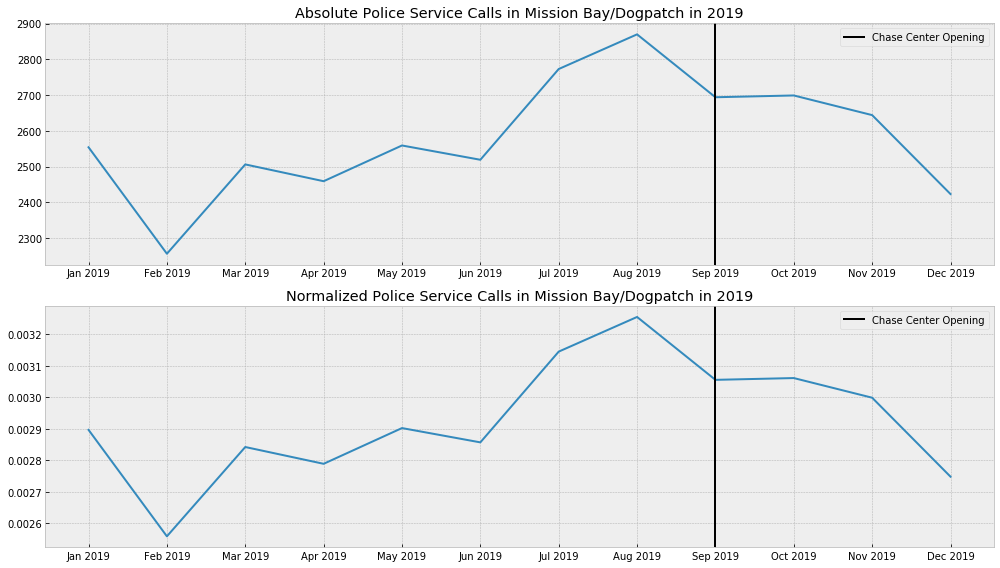

In [68]:
#Police Service Calls in 2019
pol2019 = polpresentneighbor[polpresentneighbor['Year']==2019].sort_values('Incident Date')
monthly = pol2019.groupby('Month')
months = pol2019['Month-Year'].unique()

fig, ax = plt.subplots(2,1,figsize=(14,8))
ax[0].plot(months, monthly.count()['Norm'])
ax[0].axvline('Sep 2019', color='black', label='Chase Center Opening')
ax[0].set_xticks(months)
ax[0].set_title('Absolute Police Service Calls in Mission Bay/Dogpatch in 2019')
ax[0].legend(loc='upper right')
ax[1].plot(months, monthly.sum()['Norm'])
ax[1].axvline('Sep 2019', color='black', label='Chase Center Opening')
ax[1].set_xticks(months)
ax[1].set_title('Normalized Police Service Calls in Mission Bay/Dogpatch in 2019')
ax[1].legend(loc='upper right')
plt.savefig('Graphs/2019_Crime_DPMS.png')
plt.tight_layout()
plt.show()

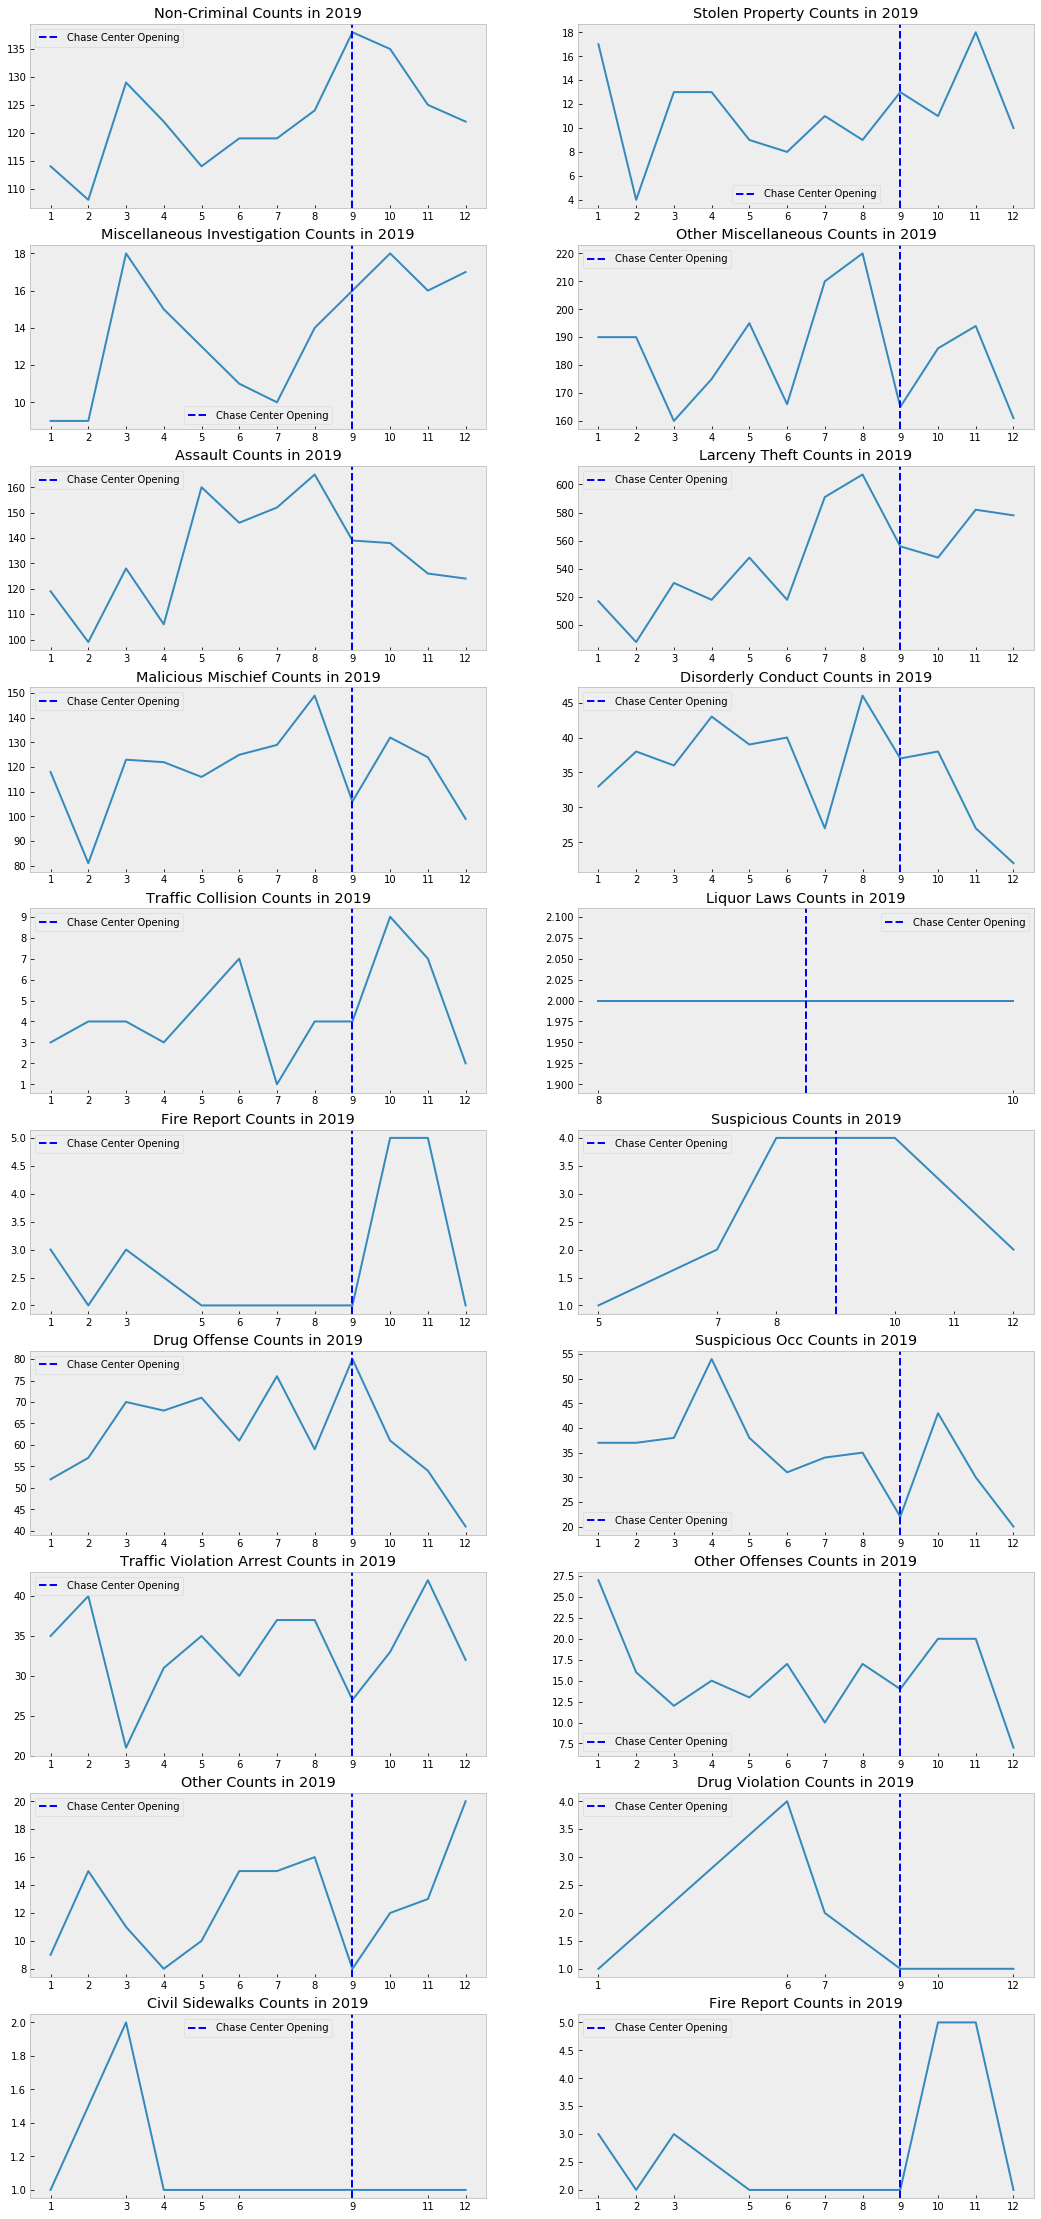

In [271]:
#Absolute Values
fig, axes = plt.subplots(10,2, figsize=(18,40))
for ix, ax in enumerate(axes.flatten()):
    graph = pol2019[pol2019['Incident Category']==cats_of_interest[ix]].sort_values('Incident Date')
    ax.plot(graph['Month'].unique(),graph.groupby('Month').count()['Norm'])
    ax.axvline(9, ls='--',color='blue', label='Chase Center Opening')
    ax.set_title(f'{cats_of_interest[ix]} Counts in 2019')
    ax.set_xticks(graph['Month'].unique())
    ax.legend(loc='best')
    ax.grid(None)
#     plt.savefig('Graphs/Absolute_Crime_DPMS.png')


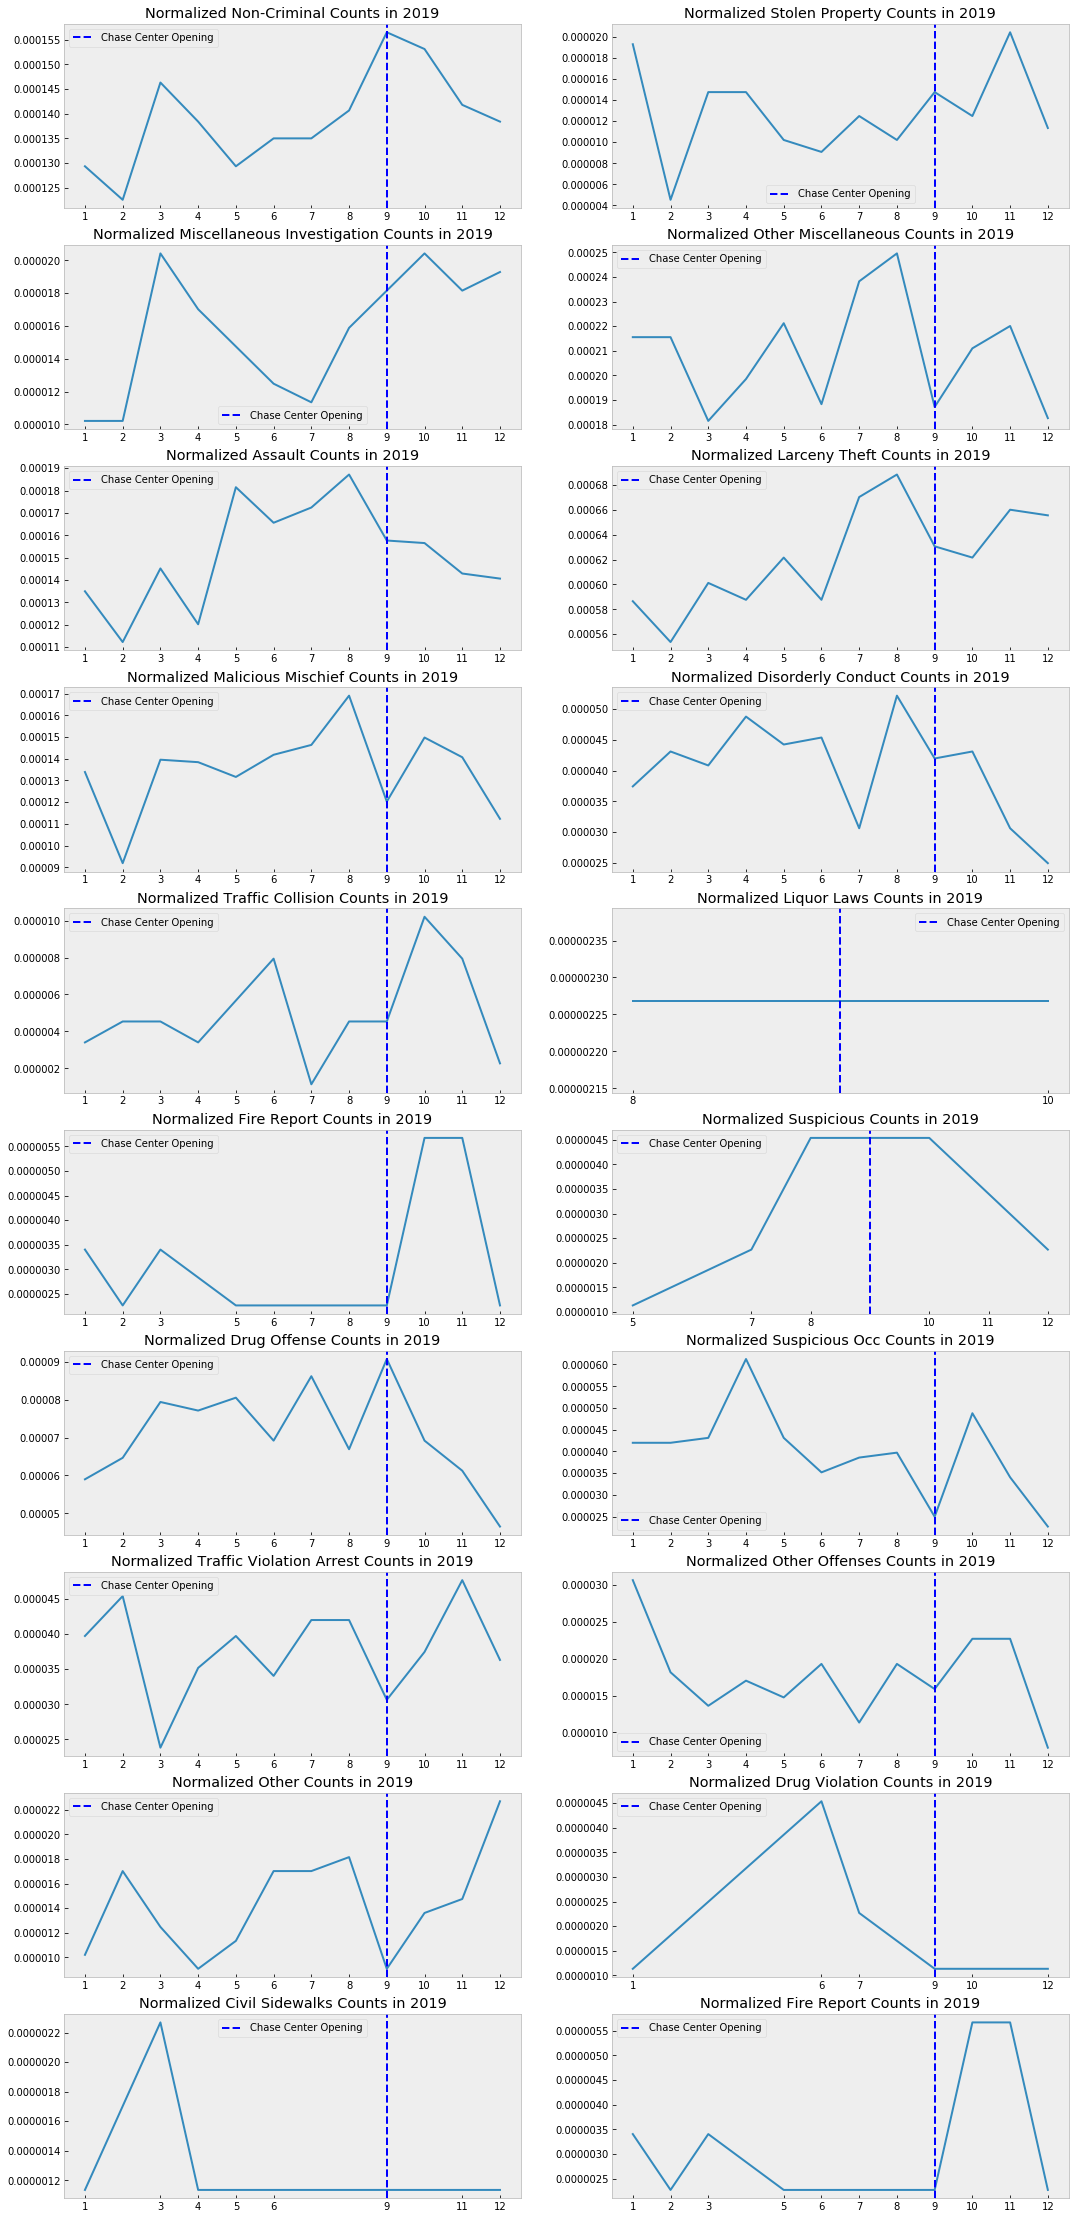

In [270]:
#Normalized Values
fig, axes = plt.subplots(10,2, figsize=(18,40))
for ix, ax in enumerate(axes.flatten()):
    graph = pol2019[pol2019['Incident Category']==cats_of_interest[ix]].sort_values('Incident Date')
    ax.plot(graph['Month'].unique(),graph.groupby('Month').sum()['Norm'])
    ax.axvline(9, ls='--',color='blue', label='Chase Center Opening')
    ax.set_title(f'Normalized {cats_of_interest[ix]} Counts in 2019')
    ax.set_xticks(graph['Month'].unique())
    ax.legend(loc='best')
    ax.grid(None)
#     plt.savefig('Graphs/Normalized_Crime_DPMS.png')


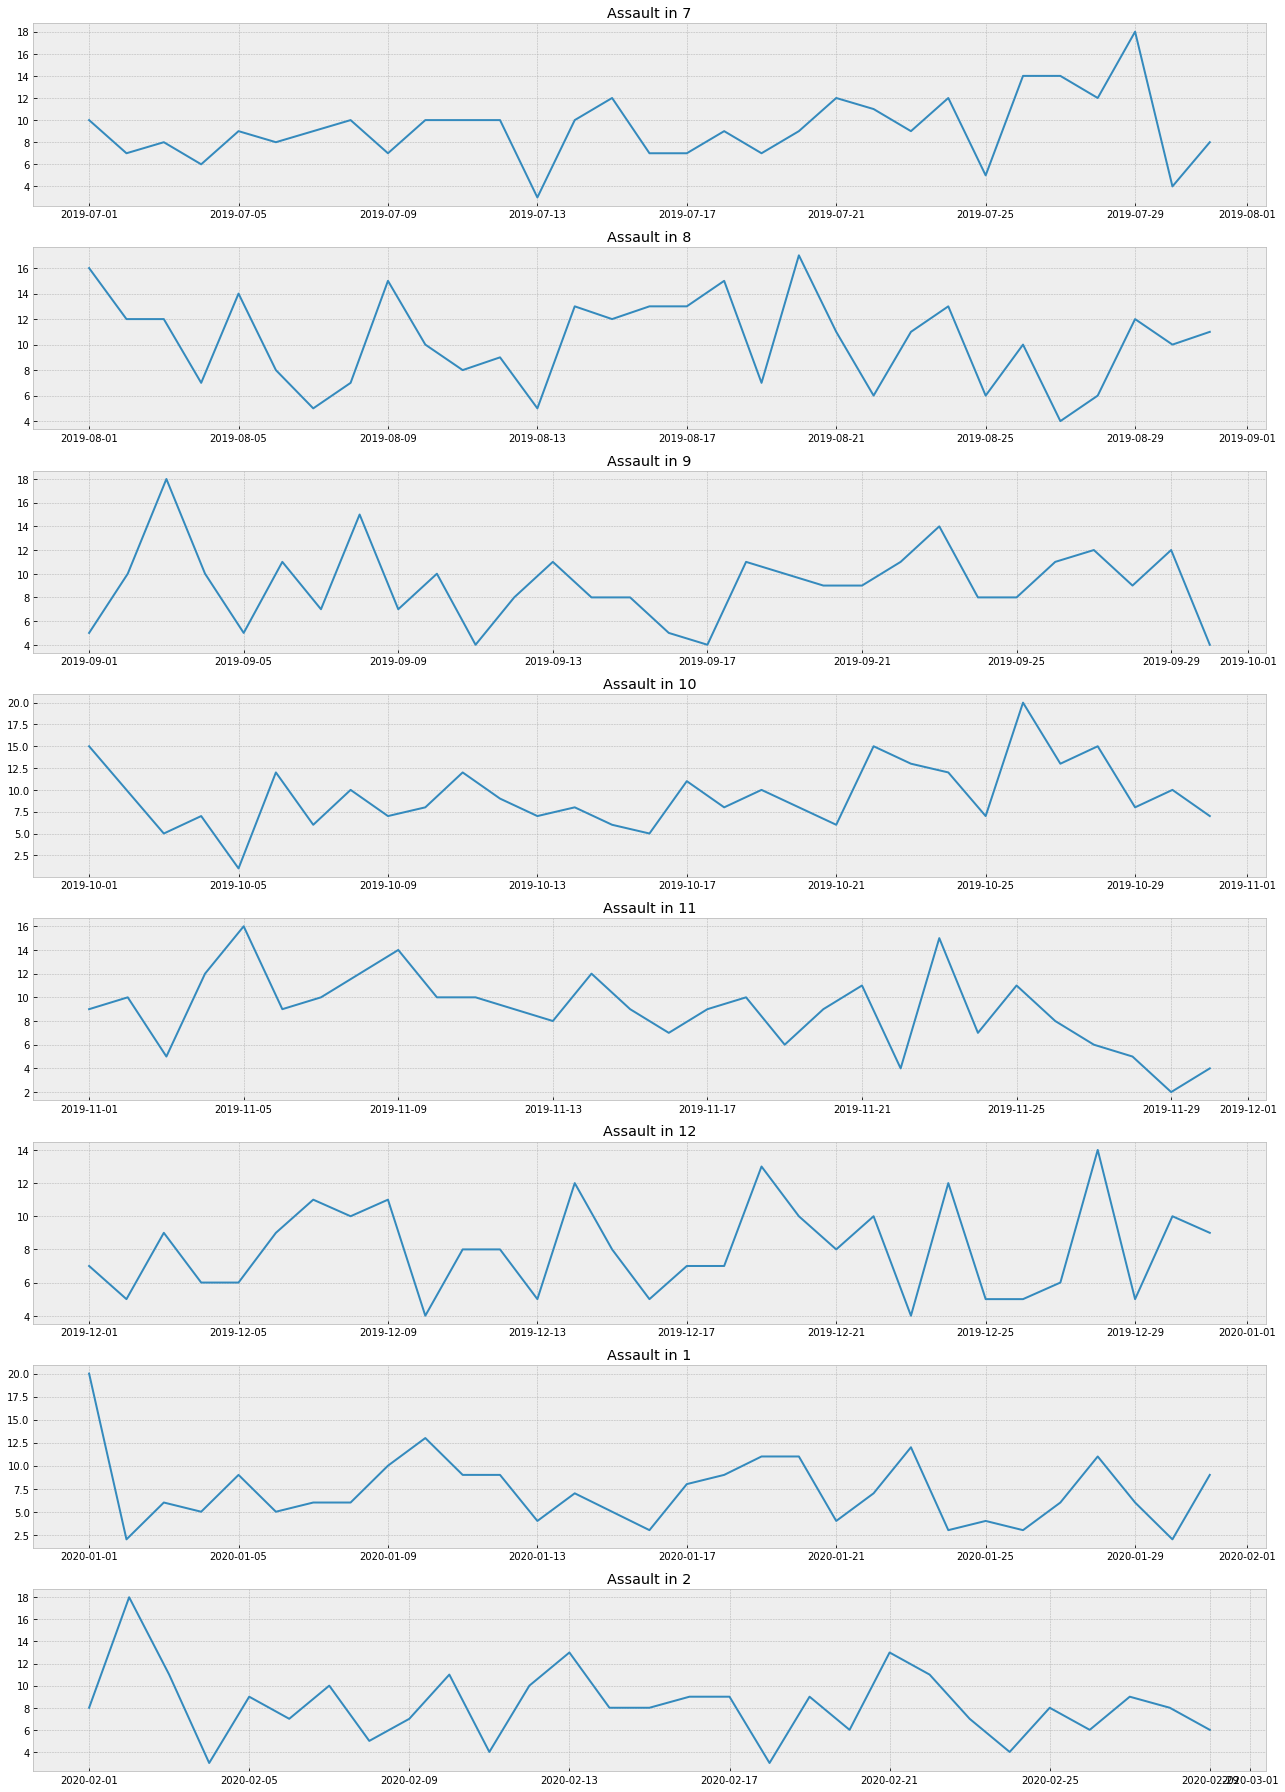

In [300]:
#Next step: Subplots per month for key indicators of interest: Medical Incidents, Alarms, Traffic Collisons
date_range = pd.date_range(start='2019-07-01', end='2020-04-01')
poljul19 = polpresentclean[polpresentclean['Incident Date'].isin(date_range)]
months = [7,8,9,10,11,12,1,2]
calls = ['Stolen Property','Miscellaneous Investigation','Other Miscellaneous','Assault', 'Larceny Theft', 
        'Disorderly Conduct','Traffic Collision','Fire Report', 'Suspicious', 'Drug Offense',
        'Suspicious Occ','Traffic Violation Arrest', 'Other Offenses', 'Other','Drug Violation']
event = calls[3]

fig, axes = plt.subplots(8,1, figsize=(18,25))
for ix, ax in enumerate(axes.flatten()):
    graph = poljul19[(poljul19['Month']==months[ix]) & (poljul19['Incident Category']==event)].sort_values('Incident Date')
    ax.plot(graph['Incident Date'].unique(),graph.groupby('Incident Date').count()['Norm'])
    ax.set_title(f'{event} in {months[ix]}')
fig.tight_layout()

## Takeaways
Per month, police are sopratic, averaging X per month. We will look specifically at Other Miscellaneous, Assault, Larceny Theft, Disorderly Conduct, Drug Offense, Suspicious Occ, Traffic Violation

**Hypothesis Testing:** 

Null Hypothesis: Average per capita rate of fire service calls on game days will be the same as non-game days

Alternative Hypothesis: Average per capita rate of fire service calls on game days will be higher than non-game days

In [43]:
#Import chase event dates
chase_events=pd.read_csv('Chase_Stadium_Events')
chase_events = chase_events.rename(columns = {'date':'Incident Date'})
chase_events['Incident Date'] = pd.to_datetime(chase_events['Incident Date'])
event_dates = chase_events['Incident Date'].unique()
chase_events = chase_events[['Incident Date','fields.type']]
chase_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 2 columns):
Incident Date    77 non-null datetime64[ns]
fields.type      77 non-null object
dtypes: datetime64[ns](1), object(1)
memory usage: 1.3+ KB


In [45]:
#Only looking at categories in "Calls of interest"
date_range = pd.date_range(start='2019-09-01', end='2020-04-01')
pol2020 = polpresentclean[polpresentclean['Incident Date'].isin(date_range)]
events2020 = pol2020[pol2020['Incident Date'].isin(event_dates)]
notevents2020 = pol2020[~pol2020['Incident Date'].isin(event_dates)]
events2020 = pd.merge(chase_events, events2020, on='Incident Date', how='left')
events2020[events2020['Incident Date'].isin(['2019-12-21', '2020-01-11'])].groupby(['Incident Date',
                                                                                    'Incident Time', 'fields.type'
#                                                                                 'Incident Category',
#                                                                                 'Incident Description',
                                                                                    ]).count().sort_values('Incident Category', ascending=False)

Incident Category  \
Incident Date Incident Time fields.type                      
2020-01-11    01:00         cce                          8   
              21:00         cce                          8   
2019-12-21    11:21         cce                          6   
2020-01-11    10:54         cce                          6   
              18:51         cce                          6   
...                                                    ...   
2019-12-21    18:30         cce                          2   
              18:25         cce                          2   
              18:10         cce                          2   
              17:57         cce                          2   
2020-01-11    23:30         cce                          2   

                                         Incident Description  Month  \
Incident Date Incident Time fields.type                                
2020-01-11    01:00         cce                             8      8   
              21:00         cce                             8      8   
2019-12-21    11:21         cce                             6      6   
2020-01-11    10:54         cce                             6      6   
              18:51         cce                             6      6   
...                                                       ...    ...   
2019-12-21    18:30         cce                             2      2   
              18:25         cce                             2      2   
              18:10         cce                             2      2   
              17:57         cce                             2      2   
2020-01-11    23:30         cce                             2      2   

                                         Month-Year  Year  Zipcode  \
Incident Date Incident Time fields.type                              
2020-01-11    01:00         cce                   8     8        8   
              21:00         cce                   8     8        8   
2019-12-21    11:21         cce                   6     6        6   
2020-01-11    10:54         cce                   6     6        6   
              18:51         cce                   6     6        6   
...                                             ...   ...      ...   
2019-12-21    18:30         cce                   2     2        2   
              18:25         cce                   2     2        2   
              18:10         cce                   2     2        2   
              17:57         cce                   2     2        2   
2020-01-11    23:30         cce                   2     2        2   

                                         Police District  Longitude_x  \
Incident Date Incident Time fields.type                                 
2020-01-11    01:00         cce                        8            8   
              21:00         cce                        8            8   
2019-12-21    11:21         cce                        6            6   
2020-01-11    10:54         cce                        6            6   
              18:51         cce                        6            6   
...                                                  ...          ...   
2019-12-21    18:30         cce                        2            2   
              18:25         cce                        2            2   
              18:10         cce                        2            2   
              17:57         cce                        2            2   
2020-01-11    23:30         cce                        2            2   

                                         Latitude_x  Analysis Neighborhoods  \
Incident Date Incident Time fields.type                                       
2020-01-11    01:00         cce                   8                       8   
              21:00         cce                   8                       8   
2019-12-21    11:21         cce                   6                       6   
2020-01-11    10:54         cce          

In [350]:
notevents_group.sort_values(ascending=True).head(20)

Incident Date
2020-03-27    16
2020-03-26    28
2020-03-22    34
2020-03-23    35
2020-03-19    36
2020-03-24    37
2019-11-28    40
2020-03-17    41
2020-03-25    42
2020-03-21    45
2020-01-07    45
2020-03-14    46
2020-03-18    50
2020-03-20    52
2020-03-15    55
2019-12-29    55
2020-02-11    56
2019-12-16    57
2020-03-16    57
2019-12-26    57
Name: Norm, dtype: int64

In [46]:
events2020.groupby(['Incident Date','fields.type']).count()['Norm']
mean_events = events2020['Norm'].count()/len(events2020['Incident Date'].unique())
mean_events

84.81333333333333

In [47]:
notevents2020.groupby('Incident Date').count()['Norm']
mean_not_events = notevents2020['Norm'].count()/len(notevents2020['Incident Date'].unique())
mean_not_events

78.77611940298507

In [48]:
events_group = events2020.groupby(['Incident Date']).count()['Norm']
notevents_group = notevents2020.groupby('Incident Date').count()['Norm']
stats.mannwhitneyu(events_group, notevents_group, alternative="greater")
#Based on the MannwhitneyTest Result, events at the Chase Center do not have higher crime days
#Is this accurate if the total number of trials is different?

MannwhitneyuResult(statistic=5533.0, pvalue=0.1130535611927197)

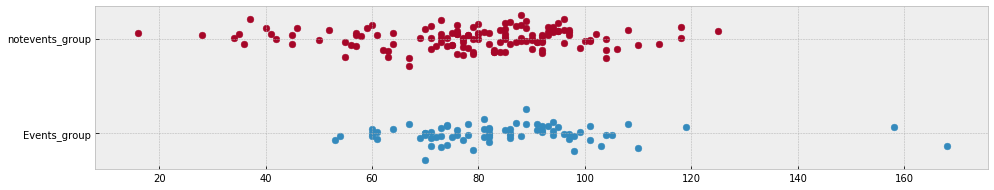

In [49]:
fig, ax = plt.subplots(1, figsize=(16, 3))

ax.scatter(events_group, np.repeat(0, len(events_group)) + np.random.normal(0, 0.1, len(events_group)), s=45)
ax.scatter(notevents_group, np.repeat(1, len(notevents_group)) + np.random.normal(0, 0.1, len(notevents_group)), s=45)
ax.set_yticks([0, 1])
ax.set_yticklabels(["Events_group", "notevents_group"])
# plt.savefig('Graphs/EventsVsNonScatter_Police.png',dpi=300)

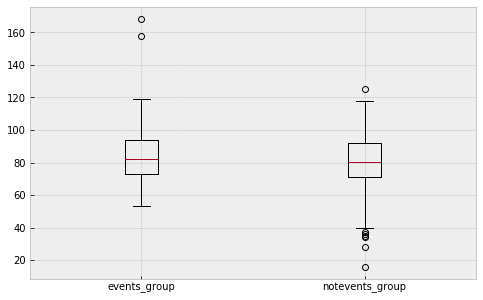

In [50]:
fig, ax = plt.subplots(1, figsize=(8, 5))
ax.boxplot([events_group, notevents_group])
ax.set_xticks([1,2])
ax.set_xticklabels(["events_group", "notevents_group"])
# plt.savefig('Graphs/EventsVsNonBox_Police.png',dpi=300)

## Need to remove outliers in Events & outliers in Not-Events (Mid-March+ after shelter in place)

In [61]:
#Removing Shelter In Place Outliers
date_range = pd.date_range(start='2020-03-12', end='2020-04-01')
new_notevents2020 = notevents2020[~notevents2020['Incident Date'].isin(date_range)]
new_notevents_group = new_notevents2020.groupby(['Incident Date']).count()['Norm']
mean_notevents_new = new_notevents2020['Norm'].count()/len(new_notevents2020['Incident Date'].unique())
sd_notevents_new = np.std(new_notevents2020.groupby('Incident Date').count()['Norm'])
print(f'Non-Event Dates at Chase Stadium have on average {mean_notevents_new} Police Calls per day, {sd_notevents_new} SD')




Non-Event Dates at Chase Stadium have on average 83.46610169491525 Police Calls per day, 14.712315954173254 SD


In [62]:
#Removing the outliers on 12/20 & 1/11
new_events2020 = events2020[~events2020['Incident Date'].isin(['2019-12-21', '2020-01-11'])]
new_events_group = new_events2020.groupby(['Incident Date']).count()['Norm']
mean_events_new = new_events2020['Norm'].count()/len(new_events2020['Incident Date'].unique())
sd_events_new = np.std(new_events2020.groupby('Incident Date').count()['Norm'])
print(f'Event Dates at Chase Stadium have on average {mean_events_new} Police Calls per day, {sd_events_new} SD')

Event Dates at Chase Stadium have on average 82.67123287671232 Police Calls per day, 13.935324970794863 SD


In [63]:
#Bootstrap samples to get the sample means distribution
events_means=[]
notevents_means=[]
for num in range(1000):
    events_means.append(np.mean([np.random.choice(new_events_group, replace=True) for x in range(100)]))
    notevents_means.append(np.mean([np.random.choice(new_notevents_group, replace=True) for x in range(100)]))

In [64]:
standard_error = sd_notevents_new/(1000**0.5)
notevents_dist = stats.norm(loc=mean_notevents_new,scale=standard_error)
# events_dist = stats.norm(loc=np.mean(events_means),scale=np.std(events_means))
print(f'Non-Event Dates have {np.mean(notevents_means)} Calls per day, Event Dates have {np.mean(events_means)} Calls per day')

Non-Event Dates have 83.45357 Calls per day, Event Dates have 82.62695000000001 Calls per day


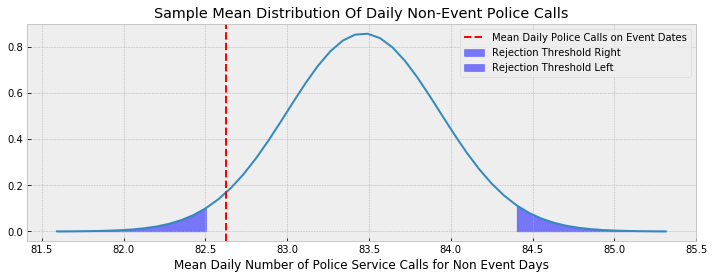

In [66]:
x=np.linspace(np.mean(notevents_means)-4*standard_error,np.mean(notevents_means)+4*standard_error,50)
critical_val_left = notevents_dist.ppf(0.025)
critical_val_right = notevents_dist.ppf(0.975)

fig, ax = plt.subplots(figsize=(12,4))
ax.plot(x,notevents_dist.pdf(x))
ax.axvline(np.mean(events_means), color='red',ls='--', label='Mean Daily Police Calls on Event Dates')
ax.fill_between(x, notevents_dist.pdf(x), 
                where=(x >= critical_val_right), color="blue", alpha=0.5, label='Rejection Threshold Right')
ax.fill_between(x, notevents_dist.pdf(x), 
                where=(x <= critical_val_left), color="blue", alpha=0.5, label='Rejection Threshold Left')
ax.set_xlabel('Mean Daily Number of Police Service Calls for Non Event Days')
ax.legend(loc='upper right')
ax.set_title('Sample Mean Distribution Of Daily Non-Event Police Calls')
# plt.savefig('Graphs/EventsVsNonHypotheisTest_Police.png',dpi=300)

In [ ]:
#To do: Calculate the p-value